The second edition of *Think DSP* is not for sale yet, but if you would like to support this project, you can [buy me a coffee](https://buymeacoffee.com/allendowney).

# Sounds and signals

A **signal** represents a quantity that varies in time.
That definition is pretty abstract, so let's start with a concrete example: sound.
Sound is variation in air pressure.
A sound signal represents variations in air pressure over time.

A microphone is a device that measures these variations and generates an electrical signal that represents sound.
A speaker is a device that takes an electrical signal and produces sound.
Microphones and speakers are called **transducers** because they transduce, or convert, signals from one form to another.

This book is about signal processing, which includes processes for synthesizing, transforming, and analyzing signals.
I will focus on sound signals, but the same methods apply to electronic signals, mechanical vibration, and signals in many other domains.

They also apply to signals that vary in space rather than time, like elevation along a hiking trail.
And they apply to signals in more than one dimension, like an image, which you can think of as a signal that varies in two-dimensional space.
Or a movie, which is a signal that varies in two-dimensional space *and* time.

But we'll start with one-dimensional sound.

[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/ThinkDSP/blob/v2/nb/chap01.ipynb).

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# download thinkdsp.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
        
download("https://github.com/AllenDowney/ThinkDSP/raw/v2/nb/thinkdsp.py")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import thinkdsp
from thinkdsp import decorate

## Periodic signals

![Segment from a recording of a bell.](figs/sounds1.pdf){height="2.5in"}

We'll start with **periodic signals**, which are signals that repeat themselves after some period of time.
For example, if you strike a bell, it vibrates and generates sound.
If you record that sound and plot the transduced signal, it looks like Figure [\[fig.sounds1\]](#fig.sounds1){reference-type="ref" reference="fig.sounds1"}.

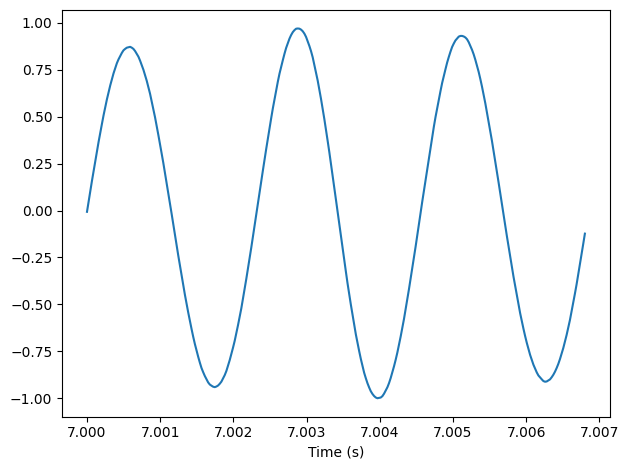

In [4]:
wave = thinkdsp.read_wave('18871__zippi1__sound-bell-440hz.wav')

start=7.0
duration=0.006835
segment = wave.segment(start, duration)
segment.normalize()

segment.plot()
decorate(xlabel='Time (s)')

This signal resembles a **sinusoid**, which means it has the same shape as the trigonometric sine function.

You can see that this signal is periodic.
I chose the duration to show three full repetitions, also known as **cycles**.
The duration of each cycle, called the **period**, is about 2.3 ms.

In [5]:
period = duration / 3
period

0.002278333333333333

The **frequency** of a signal is the number of cycles per second, which is the inverse of the period.
The units of frequency are cycles per second, or **Hertz**, abbreviated "Hz".
(Strictly speaking, the number of cycles is a dimensionless number, so a Hertz is really a "per second").

The frequency of this signal is about 439 Hz, slightly lower than 440 Hz, which is the standard tuning pitch for orchestral music.

In [6]:
freq = 1/period
freq

438.9173372348208

The musical name of this note is A, or more specifically, A4. If you are not familiar with "scientific pitch notation", the numerical suffix indicates which octave the note is in. A4 is the A above middle C. A5 is one octave higher.
See <http://en.wikipedia.org/wiki/Scientific_pitch_notation>.

A tuning fork generates a sinusoid because the vibration of the tines is a form of simple harmonic motion.
Most musical instruments produce periodic signals, but the shape of these signals is not sinusoidal.
For example, Figure [\[fig.sounds2\]](#fig.sounds2){reference-type="ref" reference="fig.sounds2"} shows a segment from a recording of a violin playing Boccherini's String Quintet No. 5 in E, 3rd movement.

In [25]:
download('https://github.com/AllenDowney/ThinkDSP/raw/master/code/92002__jcveliz__violin-origional.wav')

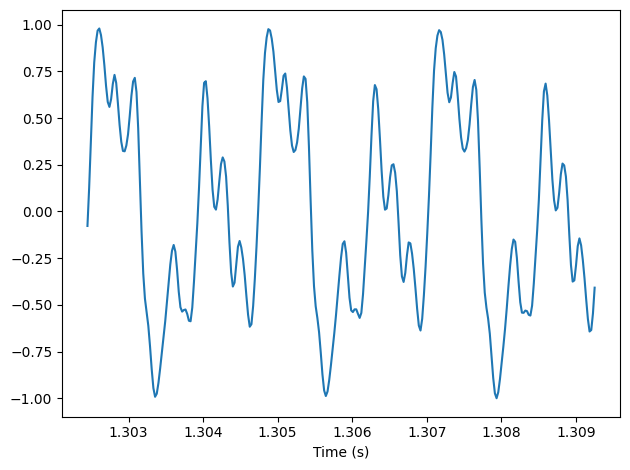

In [26]:
start=1.30245
duration=0.00683
    
wave = thinkdsp.read_wave('92002__jcveliz__violin-origional.wav')

segment = wave.segment(start, duration)
segment.normalize()

segment.plot()
decorate(xlabel='Time (s)')

In [8]:
period = duration / 3
freq = 1 / period
period, freq

(0.002276666666666667, 439.2386530014641)

Again we can see that the signal is periodic, but the shape of the signal is more complex.
The shape of a periodic signal is called the **waveform**.
Most musical instruments produce waveforms more complex than a sinusoid.
The shape of the waveform determines the musical **timbre**, which is our perception of the quality of the sound.
People usually perceive complex waveforms as richer and more interesting than sinusoids.

## Spectral decomposition

The most important topic in this book is **spectral decomposition**, which is the idea that any signal can be expressed as the sum of sinusoids with different frequencies.

The most important mathematical idea in this book is the **discrete Fourier transform**, or **DFT**, which takes a signal and produces its **spectrum**.
The spectrum is the set of sinusoids that add up to produce the signal.

And the most important algorithm in this book is the **Fast Fourier transform**, or **FFT**, which is an efficient way to compute the DFT.

For example, Figure [\[fig.sounds3\]](#fig.sounds3){reference-type="ref" reference="fig.sounds3"} shows the spectrum of the violin recording in Figure [\[fig.sounds2\]](#fig.sounds2){reference-type="ref" reference="fig.sounds2"}.
The x-axis is the range of frequencies that make up the signal.
The y-axis shows the strength or **amplitude** of each frequency component.

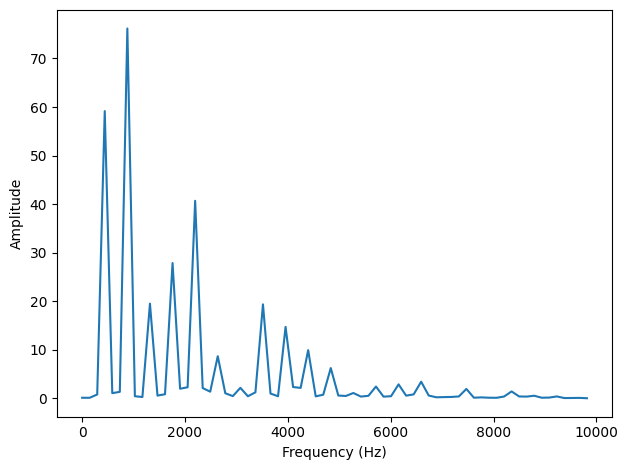

In [9]:
spectrum = segment.make_spectrum()

spectrum.plot(high=10000)
decorate(xlabel='Frequency (Hz)',
               ylabel='Amplitude')

In [10]:
peaks = spectrum.peaks()
for amp, freq in peaks[:10]:
    print(freq, amp)

879.0697674418604 76.17798540516124
439.5348837209302 59.16347454326548
2197.6744186046512 40.697348728269354
1758.139534883721 27.88382731887038
1318.6046511627906 19.52617537056222
3516.279069767442 19.37602333377786
3955.813953488372 14.738082832263192
4395.3488372093025 9.949495002349357
2637.209302325581 8.699626332652446
4834.883720930233 6.25857412248801


The lowest frequency component is called the **fundamental frequency**.
The fundamental frequency of this signal is near 440 Hz (actually a little lower, or "flat").

In this signal the fundamental frequency has the largest amplitude, so it is also the **dominant frequency**.
Normally the perceived pitch of a sound is determined by the fundamental frequency, even if it is not dominant.

The other spikes in the spectrum are at frequencies 880, 1320, 1760, and 2200, which are integer multiples of the fundamental.
These components are called **harmonics** because they are musically harmonious with the fundamental:

-   880 is the frequency of A5, one octave higher than the fundamental.
An **octave** is a doubling in frequency.

-   1320 is approximately E6, which is a perfect fifth above A5. If you are not familiar with musical intervals like \"perfect fifth", see <https://en.wikipedia.org/wiki/Interval_(music)>.

-   1760 is A6, two octaves above the fundamental.

-   2200 is approximately C$\sharp$7, which is a major third above A6.

These harmonics make up the notes of an A major chord, although not all in the same octave.
Some of them are only approximate because the notes that make up Western music have been adjusted for **equal temperament** (see <http://en.wikipedia.org/wiki/Equal_temperament>).

Given the harmonics and their amplitudes, you can reconstruct the signal by adding up sinusoids.
Next we'll see how.

## Signals

I wrote a Python module called `thinkdsp.py` that contains classes and functions for working with signals and spectrums[^1].
You will find it in the repository for this book (see Section [\[code\]](#code){reference-type="ref" reference="code"}).

To represent signals, `thinkdsp` provides a class called `Signal`, which is the parent class for several signal types, including `Sinusoid`, which represents both sine and cosine signals.

`thinkdsp` provides functions to create sine and cosine signals:

In [11]:
cos_sig = thinkdsp.CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = thinkdsp.SinSignal(freq=880, amp=0.5, offset=0)

`freq` is frequency in Hz. `amp` is amplitude in unspecified units where 1.0 is defined as the largest amplitude we can record or play back.

`offset` is a **phase offset** in radians.
Phase offset determines where in the period the signal starts.
For example, a sine signal with `offset=0` starts at $\sin 0$, which is 0. With `offset=pi/2` it starts at $\sin \pi/2$, which is 1.

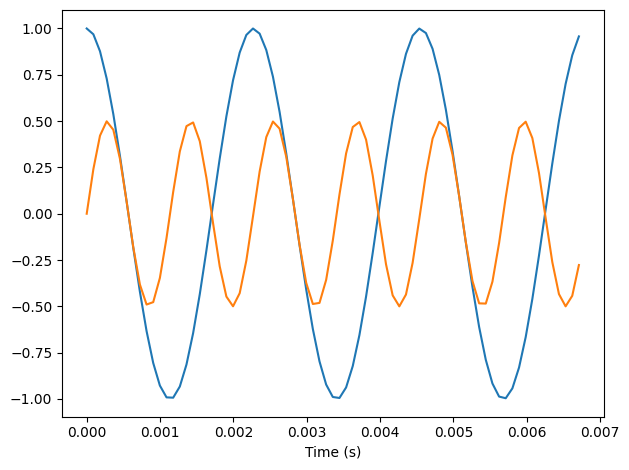

In [12]:
cos_sig.plot()
sin_sig.plot(num_periods=6)
decorate(xlabel='Time (s)')

Signals have an `__add__` method, so you can use the `+` operator to add them:

In [18]:
mix = sin_sig + cos_sig

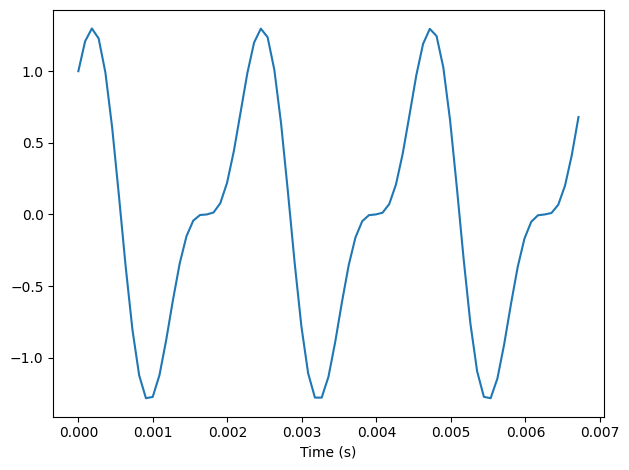

In [20]:
mix.plot()
decorate(xlabel='Time (s)')

The result is a `SumSignal`, which represents the sum of two or more signals.

A Signal is basically a Python representation of a mathematical function.
Most signals are defined for all values of `t`, from negative infinity to infinity.

You can't do much with a Signal until you evaluate it. In this context, "evaluate" means taking a sequence of points in time, ` ts`, and computing the corresponding values of the signal, `ys`.
I represent `ts` and `ys` using NumPy arrays and encapsulate them in an object called a Wave.

A Wave represents a signal evaluated at a sequence of points in time.
Each point in time is called a **frame** (a term borrowed from movies and video).
The measurement itself is called a **sample**, although "frame" and "sample" are sometimes used interchangeably.

`Signal` provides `make_wave`, which returns a new Wave object:

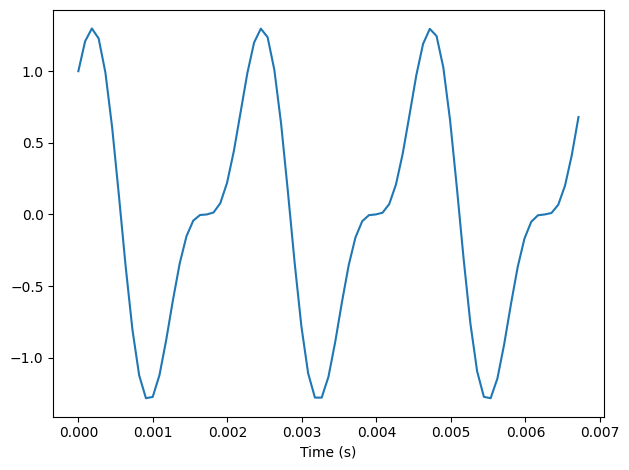

In [20]:
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)

`duration` is the length of the Wave in seconds.
`start` is the start time, also in seconds.
`framerate` is the (integer) number of frames per second, which is also the number of samples per second.

11,025 frames per second is one of several framerates commonly used in audio file formats, including Waveform Audio File (WAV) and mp3.

This example evaluates the signal from `t=0` to `t=0.5` at 5,513 equally-spaced frames (because 5,513 is half of 11,025).
The time between frames, or **timestep**, is `1/11025` seconds, about 91 $\mu$s.

`Wave` provides a `plot` method that ...

In [21]:
from IPython.display import Audio
audio = Audio(data=wave.ys, rate=wave.framerate)
audio



![Segment from a mixture of two sinusoid signals.](figs/sounds4.pdf){height="2.5in"}

At `freq=440` there are 220 periods in 0.5 seconds, so this plot would look like a solid block of color.
To zoom in on a small number of periods, we can use `segment`, which copies a segment of a Wave and returns a new wave:

In [22]:
period = mix.period
segment = wave.segment(start=0, duration=period*3)

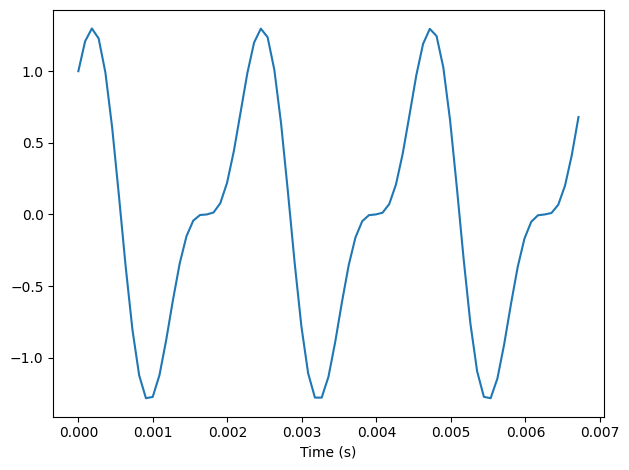

In [23]:
segment.plot()
decorate(xlabel='Time (s)')

`period` is a property of a Signal; it returns the period in seconds.

`start` and `duration` are in seconds.
This example copies the first three periods from `mix`.
The result is a Wave object.

If we plot `segment`, it looks like Figure [\[fig.sounds4\]](#fig.sounds4){reference-type="ref" reference="fig.sounds4"}.
This signal contains two frequency components, so it is more complicated than the signal from the tuning fork, but less complicated than the violin.

## Reading and writing Waves

`thinkdsp` provides `read_wave`, which reads a WAV file and returns a Wave:

In [27]:
wave = thinkdsp.read_wave('92002__jcveliz__violin-origional.wav')

And `Wave` provides `write`, which writes a WAV file:

In [30]:
wave.write(filename='output.wav')

Writing output.wav


You can listen to the Wave with any media player that plays WAV files.
On UNIX systems, I use `aplay`, which is simple, robust, and included in many Linux distributions.

`thinkdsp` also provides `play_wave`, which runs the media player as a subprocess:

In [31]:
thinkdsp.play_wave(filename='output.wav', player='aplay')

Playing WAVE 'output.wav' : Signed 16 bit Little Endian, Rate 44100 Hz, Mono


It uses `aplay` by default, but you can provide the name of another player.

## Spectrums

`Wave` provides `make_spectrum`, which returns a `Spectrum`:

In [32]:
spectrum = wave.make_spectrum()

And `Spectrum` provides `plot`:

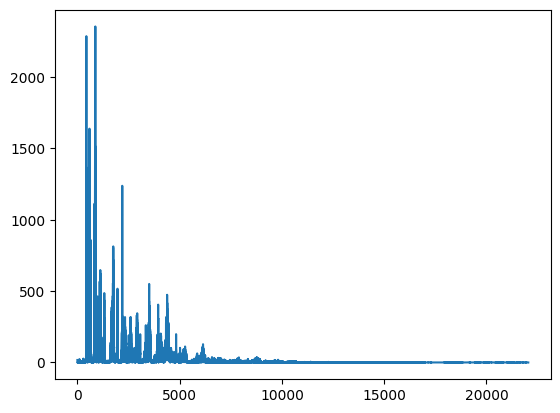

In [33]:
spectrum.plot()

`Spectrum` provides three methods that modify the spectrum:

-   `low_pass` applies a low-pass filter, which means that components above a given cutoff frequency are attenuated (that is, reduced in magnitude) by a factor.

-   `high_pass` applies a high-pass filter, which means that it attenuates components below the cutoff.

-   `band_stop` attenuates components in the band of frequencies between two cutoffs.

This example attenuates all frequencies above 600 by 99%:

In [34]:
spectrum.low_pass(cutoff=600, factor=0.01)

A low pass filter removes bright, high-frequency sounds, so the result sounds muffled and darker.
To hear what it sounds like, you can convert the Spectrum back to a Wave, and then play it.

In [35]:
wave = spectrum.make_wave()
wave.play('temp.wav')

Writing temp.wav


Playing WAVE 'temp.wav' : Signed 16 bit Little Endian, Rate 44100 Hz, Mono


The `play` method writes the wave to a file and then plays it. If you use Jupyter notebooks, you can use `make_audio`, which makes an Audio widget that plays the sound.

## Wave objects

![Relationships among the classes in `thinkdsp`.](figs/uml_diagram1.pdf){width="3.5in"}

There is nothing very complicated in `thinkdsp.py`.
Most of the functions it provides are thin wrappers around functions from NumPy and SciPy.

The primary classes in `thinkdsp` are Signal, Wave, and Spectrum.
Given a Signal, you can make a Wave.
Given a Wave, you can make a Spectrum, and vice versa.
These relationships are shown in Figure [\[fig.diagram1\]](#fig.diagram1){reference-type="ref" reference="fig.diagram1"}.

A Wave object contains three attributes: `ys` is a NumPy array that contains the values in the signal; `ts` is an array of the times where the signal was evaluated or sampled; and ` framerate` is the number of samples per unit of time.
The unit of time is usually seconds, but it doesn't have to be. In one of my examples, it's days.

Wave also provides three read-only properties: `start`, `end`, and `duration`.
If you modify `ts`, these properties change accordingly.

To modify a wave, you can access the `ts` and `ys` directly.
For example:

In [36]:
wave.ys *= 2
wave.ts += 1

The first line scales the wave by a factor of 2, making it louder.
The second line shifts the wave in time, making it start 1 second later.

But Wave provides methods that perform many common operations.
For example, the same two transformations could be written:

In [37]:
wave.scale(2)
wave.shift(1)

You can read the documentation of these methods and others at <http://greenteapress.com/thinkdsp.html>.

## Signal objects

Signal is a parent class that provides functions common to all kinds of signals, like `make_wave`.
Child classes inherit these methods and provide `evaluate`, which evaluates the signal at a given sequence of times.

For example, Sinusoid is a child class of Signal, with this definition:

In [40]:
from thinkdsp import Signal

class Sinusoid(Signal):

    def __init__(self, freq=440, amp=1.0, offset=0, func=np.sin):
        Signal.__init__(self)
        self.freq = freq
        self.amp = amp
        self.offset = offset
        self.func = func

The parameters of `__init__` are:

-   `freq`: frequency in cycles per second, or Hz.

-   `amp`: amplitude.
The units of amplitude are arbitrary, usually chosen so 1.0 corresponds to the maximum input from a microphone or maximum output to a speaker.

-   `offset`: indicates where in its period the signal starts; `offset` is in units of radians, for reasons I explain below.

-   `func`: a Python function used to evaluate the signal at a particular point in time.
It is usually either `np.sin` or `np.cos`, yielding a sine or cosine signal.

Like many init methods, this one just tucks the parameters away for future use.

Signal provides `make_wave`, which looks like this:

In [41]:
def make_wave(self, duration=1, start=0, framerate=11025):
    n = round(duration * framerate)
    ts = start + np.arange(n) / framerate
    ys = self.evaluate(ts)
    return Wave(ys, ts, framerate=framerate)

`start` and `duration` are the start time and duration in seconds.
`framerate` is the number of frames (samples) per second.

`n` is the number of samples, and `ts` is a NumPy array of sample times.

To compute the `ys`, `make_wave` invokes `evaluate`, which is provided by `Sinusoid`:

In [42]:
def evaluate(self, ts):
    phases = PI2 * self.freq * ts + self.offset
    ys = self.amp * self.func(phases)
    return ys

Let's unwind this function one step at time:

1.  `self.freq` is frequency in cycles per second, and each element of `ts` is a time in seconds, so their product is the number of cycles since the start time.

2.  `PI2` is a constant that stores $2 \pi$.
Multiplying by `PI2` converts from cycles to **phase**.
You can think of phase as "cycles since the start time" expressed in radians.
Each cycle is $2 \pi$ radians.

3.  `self.offset` is the phase when $t$ is `ts[0]`.
It has the effect of shifting the signal left or right in time.

4.  If `self.func` is `np.sin` or `np.cos`, the result is a value between $-1$ and $+1$.

5.  Multiplying by `self.amp` yields a signal that ranges from `-self.amp` to `+self.amp`.

In math notation, `evaluate` is written like this: $$y = A \cos (2 \pi f t + \phi_0)$$ where $A$ is amplitude, $f$ is frequency, $t$ is time, and $\phi_0$ is the phase offset.
It may seem like I wrote a lot of code to evaluate one simple expression, but as we'll see, this code provides a framework for dealing with all kinds of signals, not just sinusoids.

## Exercises

### Exercise 1

Go to http://freesound.org and download a sound sample that
includes music, speech, or other sounds that have a well-defined pitch.
Select a roughly half-second segment where the pitch is
constant.  Compute and plot the spectrum of the segment you selected.
What connection can you make between the timbre of the sound and the
harmonic structure you see in the spectrum?

Use `high_pass`, `low_pass`, and `band_stop` to
filter out some of the harmonics.  Then convert the spectrum back
to a wave and listen to it.  How does the sound relate to the
changes you made in the spectrum?

### Solution

I chose this recording (or synthesis?) of a trumpet section http://www.freesound.org/people/Dublie/sounds/170255/

As always, thanks to the people who contributed these recordings!

In [43]:
download('https://github.com/AllenDowney/ThinkDSP/raw/master/code/170255__dublie__trumpet.wav')

In [44]:
wave = thinkdsp.read_wave('170255__dublie__trumpet.wav')
wave.normalize()
wave.make_audio()

Here's what the whole wave looks like:

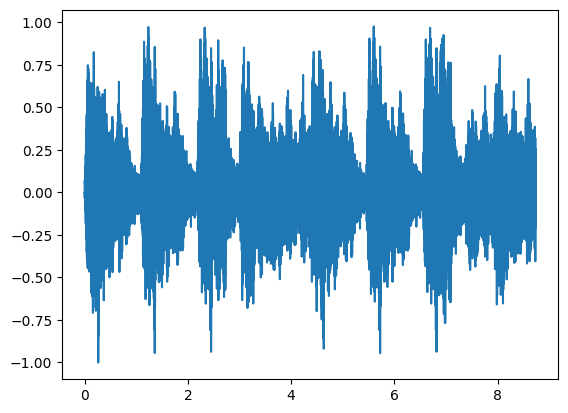

In [45]:
wave.plot()

By trial and error, I selected a segment with a constant pitch (although I believe it is a chord played by at least two horns).

In [46]:
segment = wave.segment(start=1.1, duration=0.3)
segment.make_audio()

Here's what the segment looks like:


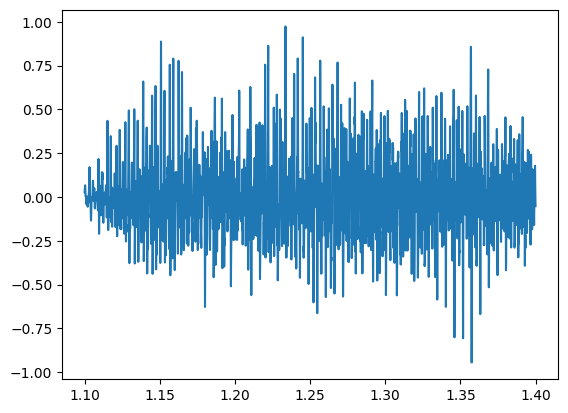

In [47]:
segment.plot()

And here's an even shorter segment so you can see the waveform:

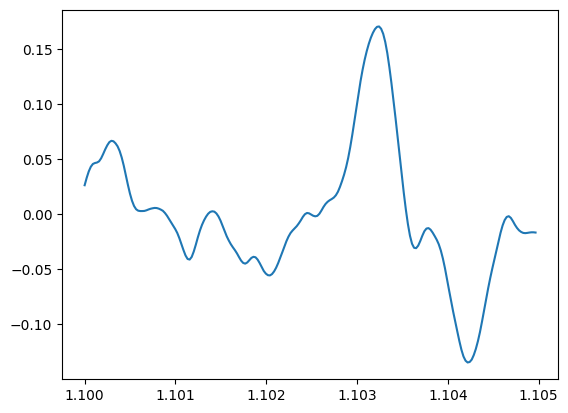

In [48]:
segment.segment(start=1.1, duration=0.005).plot()

Here's what the spectrum looks like:

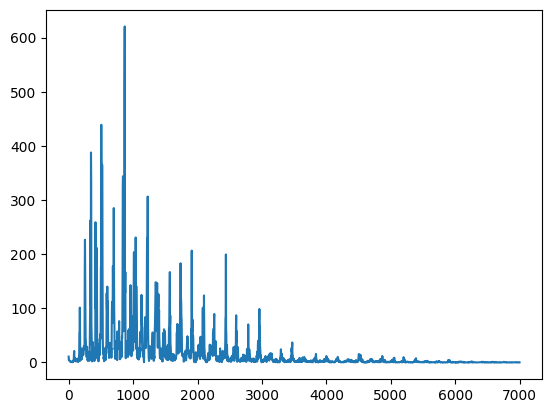

In [49]:
spectrum = segment.make_spectrum()
spectrum.plot(high=7000)

It has lots of frequency components.  Let's zoom in on the fundamental and dominant frequencies:

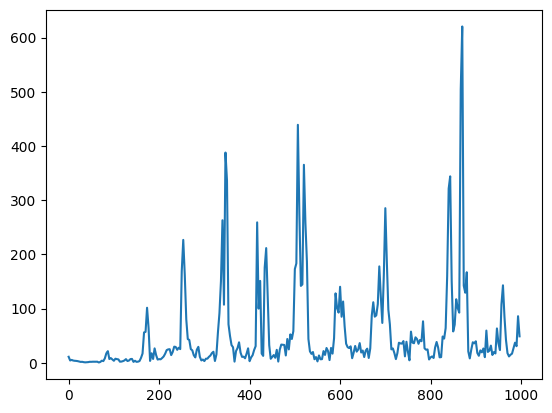

In [50]:
spectrum = segment.make_spectrum()
spectrum.plot(high=1000)

`peaks` prints the highest points in the spectrum and their frequencies, in descending order:

In [51]:
spectrum.peaks()[:30]

[(np.float64(620.4417258380604), np.float64(870.0)),
 (np.float64(504.0431989726267), np.float64(866.6666666666667)),
 (np.float64(438.97048697396673), np.float64(506.6666666666667)),
 (np.float64(387.7685406393177), np.float64(346.6666666666667)),
 (np.float64(365.1860713882272), np.float64(520.0)),
 (np.float64(343.861689481174), np.float64(843.3333333333334)),
 (np.float64(336.1531738863099), np.float64(350.0)),
 (np.float64(321.2246582837963), np.float64(840.0)),
 (np.float64(306.42030330882983), np.float64(1226.6666666666667)),
 (np.float64(285.12868197300406), np.float64(700.0)),
 (np.float64(274.1033878605897), np.float64(510.0)),
 (np.float64(262.84411351625783), np.float64(340.0)),
 (np.float64(258.9390175932505), np.float64(416.6666666666667)),
 (np.float64(258.2367736697979), np.float64(523.3333333333334)),
 (np.float64(230.80255875889878), np.float64(1040.0)),
 (np.float64(229.69071519846116), np.float64(1216.6666666666667)),
 (np.float64(226.6036986747652), np.float64(253.

The dominant peak is at 870 Hz.  It's not easy to dig out the fundamental, but with peaks at 507, 347, and 253 Hz, we can infer a fundamental at roughly 85 Hz, with harmonics at 170, 255, 340, 425, and 510 Hz.

85 Hz is close to F2 at 87 Hz.  The pitch we perceive is usually the fundamental, even when it is not dominant.  When you listen to this segment, what pitch(es) do you perceive?

Next we can filter out the high frequencies:

In [52]:
spectrum.low_pass(2000)

And here's what it sounds like:

In [53]:
spectrum.make_wave().make_audio()

The following interaction allows you to select a segment and apply different filters.  If you set the cutoff to 3400 Hz, you can simulate what the sample would sound like over an old (not digital) phone line.

In [54]:
from thinkdsp import decorate
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(high=5000, color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [55]:
from ipywidgets import interact, fixed

interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…

### Exercise 2

Synthesize a compound signal by creating SinSignal and CosSignal
objects and adding them up.  Evaluate the signal to get a Wave,
and listen to it.  Compute its Spectrum and plot it.
What happens if you add frequency
components that are not multiples of the fundamental?

### Solution

Here are some arbitrary components I chose.  It makes an interesting waveform!

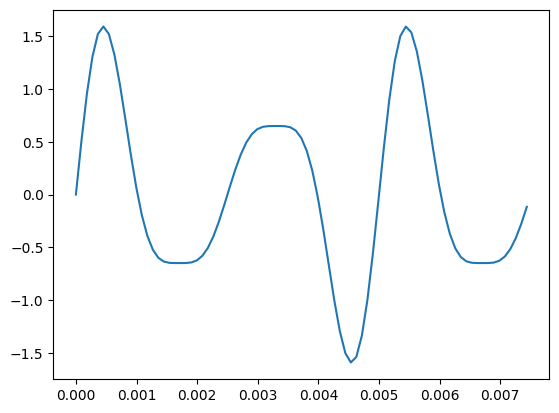

In [56]:
from thinkdsp import SinSignal

signal = (SinSignal(freq=400, amp=1.0) +
          SinSignal(freq=600, amp=0.5) +
          SinSignal(freq=800, amp=0.25))
signal.plot()

We can use the signal to make a wave:

In [57]:
wave2 = signal.make_wave(duration=1)
wave2.apodize()

And here's what it sounds like:

In [58]:
wave2.make_audio()

The components are all multiples of 200 Hz, so they make a coherent sounding tone.

Here's what the spectrum looks like:

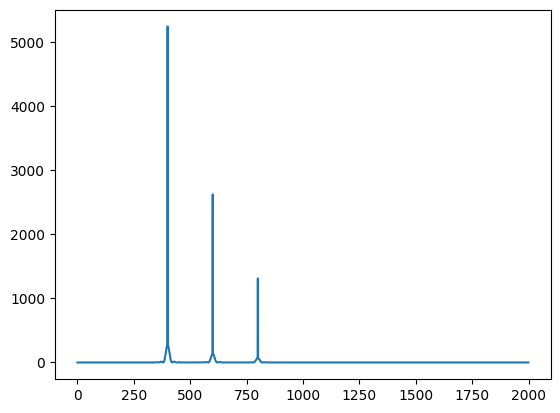

In [59]:
spectrum = wave2.make_spectrum()
spectrum.plot(high=2000)

If we add a component that is not a multiple of 200 Hz, we hear it as a distinct pitch.

In [60]:
signal += SinSignal(freq=450)
signal.make_wave().make_audio()

### Exercise 3

Write a function called `stretch` that takes a Wave and a stretch factor and speeds up or slows down the wave by modifying `ts` and `framerate`.  Hint: it should only take two lines of code.

### Solution

I'll use the trumpet example again:

In [62]:
wave3 = thinkdsp.read_wave('170255__dublie__trumpet.wav')
wave3.normalize()
wave3.make_audio()

Here's my implementation of `stretch`

In [63]:
def stretch(wave, factor):
    wave.ts *= factor
    wave.framerate /= factor

And here's what it sounds like if we speed it up by a factor of 2.

In [64]:
stretch(wave3, 0.5)
wave3.make_audio()

Here's what it looks like (to confirm that the `ts` got updated correctly).

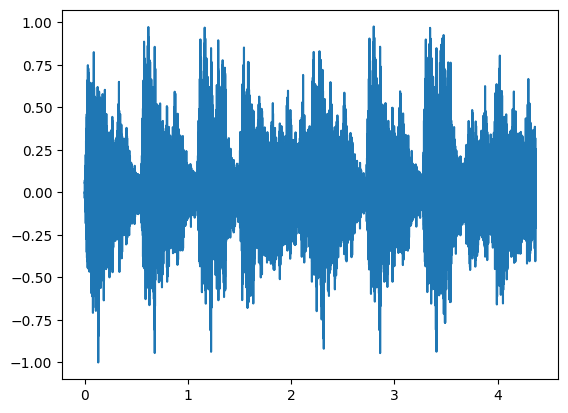

In [66]:
wave3.plot()

I think it sounds better speeded up.  In fact, I wonder if we are playing the original at the right speed.

[Think DSP: Digital Signal Processing in Python, 2rd Edition](https://allendowney.github.io/ThinkDSP/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

License: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)